<a href="https://colab.research.google.com/github/jungeKatz/colab-notebooks/blob/main/titanic_challenge_one_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
pd.concat?

In [ ]:
survival = pd.read_csv('/content/drive/MyDrive/titanic/gender_submission.csv')
test_set = pd.read_csv('/content/drive/MyDrive/titanic/test.csv')
train_set = pd.read_csv('/content/drive/MyDrive/titanic/train.csv')

In [ ]:
test_set.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
survival.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [ ]:
# survival = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')
# test_set = pd.read_csv('/kaggle/input/titanic/test.csv')
# train_set = pd.read_csv('/kaggle/input/titanic/train.csv')


In [ ]:

test_set = pd.merge(test_set, survival, how='inner', on='PassengerId')
titanic = pd.concat([train_set, test_set],axis=0,sort=False)

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 132.9+ KB


In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
survival.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [ ]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.377387,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.484918,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 132.9+ KB


In [ ]:
# dropping as not required
titanic.drop(['Name','Cabin','Ticket','Embarked','PassengerId'],axis = 1,inplace = True)

In [ ]:
# dropping as not required
#test_set.drop(['Name','Cabin','Ticket','Embarked','PassengerId'],axis = 1,inplace = True)

In [ ]:
#test_set=test_set[~test_set['Fare'].isnull()]

In [ ]:
(titanic.isnull().sum() * 100 / len(titanic)).sort_values(ascending = False)

Age         20.091673
Fare         0.076394
Parch        0.000000
SibSp        0.000000
Sex          0.000000
Pclass       0.000000
Survived     0.000000
dtype: float64

In [ ]:
#titanic['Age'].fillna(int(titanic['Age'].mean()), inplace=True)

In [ ]:
train_set['Age'].mean()

29.69911764705882

In [ ]:
#train_set['Age'].fillna(int(train_set['Age'].mean()), inplace=True)

In [ ]:
#train_set['Embarked']=train_set.Embarked(axis=0,inplace=True)

In [ ]:
titanic=titanic[~titanic['Fare'].isnull()]
titanic=titanic[~titanic['Age'].isnull()]


In [ ]:
(titanic.isnull().sum() * 100 / len(titanic)).sort_values(ascending = False)

Fare        0.0
Parch       0.0
SibSp       0.0
Age         0.0
Sex         0.0
Pclass      0.0
Survived    0.0
dtype: float64

In [ ]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [ ]:
titanic.Fare.value_counts()

13.0000    58
26.0000    48
8.0500     38
10.5000    35
7.8958     30
           ..
8.1583      1
8.0292      1
12.7375     1
25.7000     1
7.1417      1
Name: Fare, Length: 256, dtype: int64

In [ ]:
titanic.Fare.describe()

count    1045.000000
mean       36.686080
std        55.732533
min         0.000000
25%         8.050000
50%        15.750000
75%        35.500000
max       512.329200
Name: Fare, dtype: float64

## next to convert columns on categorical variables

In [ ]:
# Since the ticket prices are very uneven 
print(titanic['Fare'].min())
print(titanic['Fare'].max())

0.0
512.3292


In [ ]:
titanic['FareClass'] = pd.qcut(titanic.Fare,q=10,labels=['10th','9th','8th','7th','6th','5th','4th','3rd','2nd','1st'])
#test_set['FareClass'] = pd.qcut(test_set.Fare,q=10,labels=['10th','9th','8th','7th','6th','5th','4th','3rd','2nd','1st'])
titanic.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,FareClass
0,0,3,male,22.0,1,0,7.2500,10th
1,1,1,female,38.0,1,0,71.2833,2nd
2,1,3,female,26.0,0,0,7.9250,8th
3,1,1,female,35.0,1,0,53.1000,2nd
4,0,3,male,35.0,0,0,8.0500,8th
6,0,1,male,54.0,0,0,51.8625,2nd
7,0,3,male,2.0,3,1,21.0750,5th
8,1,3,female,27.0,0,2,11.1333,7th
9,1,2,female,14.0,1,0,30.0708,3rd
10,1,3,female,4.0,1,1,16.7000,5th


In [ ]:
pivotTable = pd.pivot_table(titanic, index= 'FareClass', values= "Survived", aggfunc='sum')
pivotTable.reset_index()


,FareClass,Survived
0,10th,30
1,9th,16
2,8th,26
3,7th,49
4,6th,21
5,5th,67
6,4th,29
7,3rd,42
8,2nd,63
9,1st,74


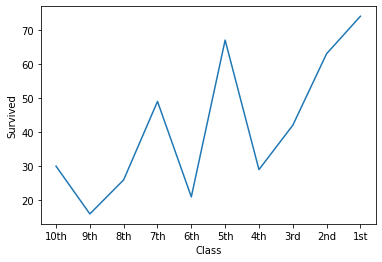

In [ ]:
import matplotlib.pyplot as plt
   

  
plt.plot(pivotTable.index, pivotTable.Survived)

plt.xlabel('Class')
plt.ylabel('Survived')
plt.show()

In [ ]:
pivotTable = pd.pivot_table(titanic, index= 'Pclass', values= "Survived", aggfunc='sum')
pivotTable.reset_index()


,Pclass,Survived
0,1,170
1,2,112
2,3,135


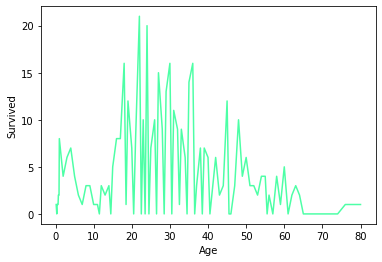

In [ ]:
pivotTable = pd.pivot_table(titanic, index= 'Age', values= "Survived", aggfunc='sum')
pivotTable.reset_index()
plt.plot(pivotTable.index, pivotTable.Survived,color ="#4dffa6")

plt.xlabel('Age')
plt.ylabel('Survived')
plt.show()

In [ ]:
pivotTable.reset_index().sort_values(by="Survived",ascending=False)

,Age,Survived
32,22.0,21
36,24.0,20
54,36.0,16
26,18.0,16
45,30.0,16
...,...,...
68,46.0,0
67,45.5,0
52,34.5,0
55,36.5,0


In [ ]:
tn_range = [0, 10, 20, 30, 40, 50,60,70,1000]
tn_label = [ 'infants','10s', '20s', '30s', '40s', '50s','60s','70+']
titanic['Age_bins'] = pd.cut(titanic['Age'], tn_range, labels=tn_label)
#test_set['Age_bins'] = pd.cut(test_set['Age'], tn_range, labels=tn_label)
#high_val_cust['tenure_range'].head()
titanic.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,FareClass,Age_bins
0,0,3,male,22.0,1,0,7.2500,10th,20s
1,1,1,female,38.0,1,0,71.2833,2nd,30s
2,1,3,female,26.0,0,0,7.9250,8th,20s
3,1,1,female,35.0,1,0,53.1000,2nd,30s
4,0,3,male,35.0,0,0,8.0500,8th,30s
6,0,1,male,54.0,0,0,51.8625,2nd,50s
7,0,3,male,2.0,3,1,21.0750,5th,infants
8,1,3,female,27.0,0,2,11.1333,7th,20s
9,1,2,female,14.0,1,0,30.0708,3rd,10s
10,1,3,female,4.0,1,1,16.7000,5th,infants


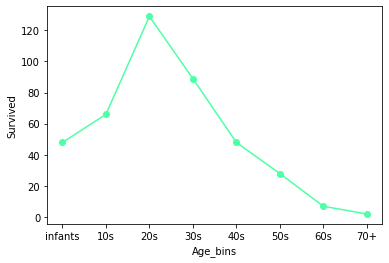

In [ ]:
pivotTable = pd.pivot_table(titanic, index= 'Age_bins', values= "Survived", aggfunc='sum')
pivotTable.reset_index()
plt.plot(pivotTable.index, pivotTable.Survived,color ="#4dffa6",marker='o')

plt.xlabel('Age_bins')
plt.ylabel('Survived')
plt.show()

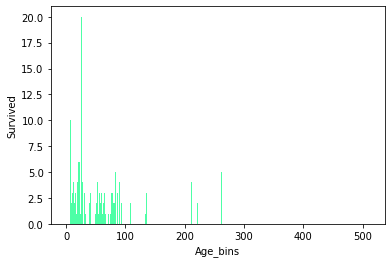

In [ ]:
pivotTable = pd.pivot_table(titanic, index= 'Fare', values= "Survived", aggfunc='sum')
pivotTable.reset_index()
plt.bar(pivotTable.index, pivotTable.Survived,color ="#4dffa6")

plt.xlabel('Age_bins')
plt.ylabel('Survived')
plt.show()


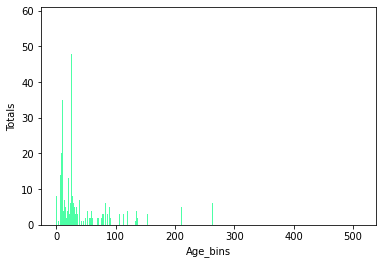

In [ ]:
pivotTable = pd.pivot_table(titanic, index= 'Fare', values= "Survived", aggfunc='count')
pivotTable.reset_index()
plt.bar(pivotTable.index, pivotTable.Survived,color ="#4dffa6")

plt.xlabel('Age_bins')
plt.ylabel('Totals')
plt.show()

In [ ]:
dummy_vars = ['Pclass','Sex','FareClass','Age_Bins','SibSp','Parch']

In [ ]:
titanic= titanic.astype({'Pclass':'str'})
titanic.Pclass = titanic.Pclass.replace({ '1':'first', '2':'second','3':'third'})
titanic= titanic.astype({'SibSp':'str'})
titanic.SibSp = titanic.SibSp.replace({ "0":"0sib",'1':'1sib', '2':'2sib','3':'3sib','4':'4sib','5':'5sib','6':'6sib'})
titanic= titanic.astype({'Parch':'str'})
titanic.Parch = titanic.Parch.replace({ "0":"0pc",'1':'1pc', '2':'2pc','3':'3pc','4':'4pc','5':'5pc','6':'6pc'})
Pclass = pd.get_dummies(titanic['Pclass'], drop_first=True)
# year = pd.get_dummies(day['yr'],drop_first=True)
Sex = pd.get_dummies(titanic['Sex'],drop_first=True)
SibSp = pd.get_dummies(titanic['SibSp'], drop_first=True)
Parch = pd.get_dummies(titanic['Parch'],drop_first=True)
FareClass = pd.get_dummies(titanic['FareClass'], drop_first=True)
Age_bins = pd.get_dummies(titanic['Age_bins'],drop_first=True)

In [ ]:
titanic = pd.concat([titanic , Pclass],axis = 1)
#day = pd.concat([day , year],axis = 1)
titanic = pd.concat([titanic , Sex],axis = 1)
titanic= pd.concat([titanic , SibSp],axis = 1)
titanic = pd.concat([titanic , Parch],axis=1)
titanic = pd.concat([titanic , FareClass],axis = 1)
titanic = pd.concat([titanic, Age_bins],axis=1)
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1045 entries, 0 to 415
Data columns (total 40 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Survived   1045 non-null   int64   
 1   Pclass     1045 non-null   object  
 2   Sex        1045 non-null   object  
 3   Age        1045 non-null   float64 
 4   SibSp      1045 non-null   object  
 5   Parch      1045 non-null   object  
 6   Fare       1045 non-null   float64 
 7   FareClass  1045 non-null   category
 8   Age_bins   1045 non-null   category
 9   second     1045 non-null   uint8   
 10  third      1045 non-null   uint8   
 11  male       1045 non-null   uint8   
 12  1sib       1045 non-null   uint8   
 13  2sib       1045 non-null   uint8   
 14  3sib       1045 non-null   uint8   
 15  4sib       1045 non-null   uint8   
 16  5sib       1045 non-null   uint8   
 17  8          1045 non-null   uint8   
 18  1pc        1045 non-null   uint8   
 19  2pc        1045 non-null   u

In [ ]:
titanic.drop(['Pclass','Sex','FareClass','Age_bins','Parch','SibSp'],axis = 1,inplace = True)

In [ ]:
titanic.head()

,Survived,Age,Fare,second,third,male,1sib,2sib,3sib,4sib,5sib,8,1pc,2pc,3pc,4pc,5pc,6pc,9th,8th,7th,6th,5th,4th,3rd,2nd,1st,10s,20s,30s,40s,50s,60s,70+
0,0,22.0,7.2500,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,1,38.0,71.2833,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2,1,26.0,7.9250,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1,35.0,53.1000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,0,35.0,8.0500,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
X = titanic.drop(['Survived'], axis=1)
y = titanic['Survived']

print(X.shape , y.shape)

(1045, 33) (1045,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [ ]:
X_train.head()

,Age,Fare,second,third,male,1sib,2sib,3sib,4sib,5sib,8,1pc,2pc,3pc,4pc,5pc,6pc,9th,8th,7th,6th,5th,4th,3rd,2nd,1st,10s,20s,30s,40s,50s,60s,70+
816,23.0,7.9250,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
402,22.0,59.4000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
260,36.5,17.4000,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
590,35.0,7.1250,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
255,29.0,15.2458,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
y_train.head()

816    0
402    1
260    0
590    0
255    1
Name: Survived, dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Importing statsmodels api
import statsmodels.api as sm
scaler = MinMaxScaler()
from sklearn.preprocessing import scale

In [ ]:
#num_vars = ['Age', 'Fare','Parch','SibSp']

#X_train = scaler.fit_transform(X_train)

# storing column names in cols, since column names are  lost after 
# scaling (the df is converted to a numpy array)
cols = X_train.columns
X_train = pd.DataFrame(scale(X_train))
X_train.columns = cols
X_train.columns




Index(['Age', 'Fare', 'second', 'third', 'male', '1sib', '2sib', '3sib',
       '4sib', '5sib', '8', '1pc', '2pc', '3pc', '4pc', '5pc', '6pc', '9th',
       '8th', '7th', '6th', '5th', '4th', '3rd', '2nd', '1st', '10s', '20s',
       '30s', '40s', '50s', '60s', '70+'],
      dtype='object')

In [ ]:
cols = X_test.columns
X_test = pd.DataFrame(scale(X_test))
X_test.columns = cols
X_test.columns
X_test.head()

,Age,Fare,second,third,male,1sib,2sib,3sib,4sib,5sib,8,1pc,2pc,3pc,4pc,5pc,6pc,9th,8th,7th,6th,5th,4th,3rd,2nd,1st,10s,20s,30s,40s,50s,60s,70+
0,-0.642223,-0.546738,-0.579802,1.107678,-1.271482,-0.624004,-0.199337,-0.127205,-0.127205,-0.080064,0.0,-0.481012,-0.342692,-0.080064,-0.113592,-0.056523,0.0,-0.267717,-0.325014,-0.403687,-0.199337,-0.371054,-0.306719,-0.318990,-0.376588,-0.371054,-0.409006,1.390892,-0.481012,-0.435194,-0.239247,-0.17178,-0.056523
1,-1.894292,-0.373801,1.724727,-0.902790,0.786484,1.602555,-0.199337,-0.127205,-0.127205,-0.080064,0.0,2.078950,-0.342692,-0.080064,-0.113592,-0.056523,0.0,-0.267717,-0.325014,-0.403687,-0.199337,2.695025,-0.306719,-0.318990,-0.376588,-0.371054,-0.409006,-0.718963,-0.481012,-0.435194,-0.239247,-0.17178,-0.056523
2,0.714184,-0.440618,-0.579802,1.107678,0.786484,-0.624004,-0.199337,-0.127205,-0.127205,-0.080064,0.0,-0.481012,2.918073,-0.080064,-0.113592,-0.056523,0.0,-0.267717,-0.325014,-0.403687,5.016639,-0.371054,-0.306719,-0.318990,-0.376588,-0.371054,-0.409006,-0.718963,-0.481012,2.297825,-0.239247,-0.17178,-0.056523
3,-1.824733,-0.176889,-0.579802,1.107678,0.786484,-0.624004,-0.199337,-0.127205,7.861298,-0.080064,0.0,-0.481012,2.918073,-0.080064,-0.113592,-0.056523,0.0,-0.267717,-0.325014,-0.403687,-0.199337,-0.371054,-0.306719,3.134898,-0.376588,-0.371054,-0.409006,-0.718963,-0.481012,-0.435194,-0.239247,-0.17178,-0.056523
4,1.931473,1.744088,-0.579802,-0.902790,-1.271482,-0.624004,-0.199337,-0.127205,-0.127205,-0.080064,0.0,2.078950,-0.342692,-0.080064,-0.113592,-0.056523,0.0,-0.267717,-0.325014,-0.403687,-0.199337,-0.371054,-0.306719,-0.318990,-0.376588,2.695025,-0.409006,-0.718963,-0.481012,-0.435194,4.179783,-0.17178,-0.056523


In [ ]:
X_train.head()

,Age,Fare,second,third,male,1sib,2sib,3sib,4sib,5sib,8,1pc,2pc,3pc,4pc,5pc,6pc,9th,8th,7th,6th,5th,4th,3rd,2nd,1st,10s,20s,30s,40s,50s,60s,70+
0,-0.465047,-0.507369,-0.575771,1.017945,-1.314387,-0.596838,-0.184245,-0.123603,-0.154303,-0.074176,-0.037012,-0.400397,-0.309761,-0.090972,-0.037012,-0.082988,-0.052378,-0.33308,3.072923,-0.411825,-0.262133,-0.409551,-0.243763,-0.33308,-0.312406,-0.317653,-0.436525,1.370384,-0.510240,-0.355455,-0.25612,-0.154303,-0.082988
1,-0.534579,0.487466,-0.575771,-0.982371,-1.314387,-0.596838,-0.184245,-0.123603,-0.154303,-0.074176,-0.037012,2.497524,-0.309761,-0.090972,-0.037012,-0.082988,-0.052378,-0.33308,-0.325423,-0.411825,-0.262133,-0.409551,-0.243763,-0.33308,3.200961,-0.317653,-0.436525,1.370384,-0.510240,-0.355455,-0.25612,-0.154303,-0.082988
2,0.473638,-0.324249,-0.575771,1.017945,0.760811,1.675497,-0.184245,-0.123603,-0.154303,-0.074176,-0.037012,-0.400397,-0.309761,-0.090972,-0.037012,-0.082988,-0.052378,-0.33308,-0.325423,-0.411825,-0.262133,2.441701,-0.243763,-0.33308,-0.312406,-0.317653,-0.436525,-0.729722,1.959862,-0.355455,-0.25612,-0.154303,-0.082988
3,0.369340,-0.522830,-0.575771,1.017945,0.760811,-0.596838,-0.184245,-0.123603,-0.154303,-0.074176,-0.037012,-0.400397,-0.309761,-0.090972,-0.037012,-0.082988,-0.052378,-0.33308,-0.325423,-0.411825,-0.262133,-0.409551,-0.243763,-0.33308,-0.312406,-0.317653,-0.436525,-0.729722,1.959862,-0.355455,-0.25612,-0.154303,-0.082988
4,-0.047854,-0.365883,-0.575771,1.017945,-1.314387,-0.596838,-0.184245,-0.123603,-0.154303,-0.074176,-0.037012,-0.400397,3.228293,-0.090972,-0.037012,-0.082988,-0.052378,-0.33308,-0.325423,-0.411825,3.814865,-0.409551,-0.243763,-0.33308,-0.312406,-0.317653,-0.436525,1.370384,-0.510240,-0.355455,-0.25612,-0.154303,-0.082988


In [ ]:
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
y_train = list(y_train)
lr = sm.OLS(y_train, X_train_lm).fit()


ValueError: ignored

In [ ]:
lr.params

In [ ]:
print(lr.summary())

ValueError: ignored

In [ ]:
import seaborn as sns
%matplotlib inline

In [ ]:
X_train.head()

In [ ]:
corr_matrix = X_train.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.60
to_drop = [column for column in upper.columns if any(upper[column] > 0.40)]

X_train = X_train.drop(X_train[to_drop], axis=1)
X_train.info()

In [ ]:


X_test = X_test.drop(X_test[to_drop], axis=1)
X_test.info()

In [ ]:
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(X_train.corr(),annot = True)
plt.show()

In [ ]:
import statsmodels.api as sm

In [ ]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [ ]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train,y_train)

In [ ]:
col = X_train.columns[rfe.support_]

In [ ]:
X_train.columns[~rfe.support_]

In [ ]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

In [ ]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

In [ ]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

In [ ]:
# y_train_pred_final = pd.DataFrame({'Survived':y_train.values, 'Prob':y_train_pred})
# y_train_pred_final['passId'] = y_train.index
# y_train_pred_final.head()

In [ ]:
y_train_pred_final['predicted'] = y_train_pred_final.Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

In [ ]:
from sklearn import metrics

In [ ]:
confusion = metrics.confusion_matrix(y_train_pred_final.Survived, y_train_pred_final.predicted )
sns.heatmap(confusion, annot=True)

In [ ]:
confusion

In [ ]:
print(metrics.accuracy_score(y_train_pred_final.Survived, y_train_pred_final.predicted))

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)

In [ ]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

In [ ]:
# positive predictive value 
print (TP / float(TP+FP))

In [ ]:
# Negative predictive value
print (TN / float(TN+ FN))

In [ ]:
# test_set= test_set.astype({'Pclass':'str'})
# test_set.Pclass = test_set.Pclass.replace({ '1':'first', '2':'second','3':'third'})
# Pclass = pd.get_dummies(test_set['Pclass'], drop_first=True)
# # year = pd.get_dummies(day['yr'],drop_first=True)
# Sex = pd.get_dummies(test_set['Sex'],drop_first=True)
# # SibSp = pd.get_dummies(X['SibSp'], drop_first=True)
# # Parch = pd.get_dummies(X['Parch'],drop_first=True)
# FareClass = pd.get_dummies(test_set['FareClass'], drop_first=True)
# Age_bins = pd.get_dummies(test_set['Age_bins'],drop_first=True)

In [ ]:
# test_set = pd.concat([test_set , Pclass],axis = 1)
# #day = pd.concat([day , year],axis = 1)
# test_set = pd.concat([test_set , Sex],axis = 1)
# # X = pd.concat([X , SibSp],axis = 1)
# # X = pd.concat([X , Parch],axis=1)
# test_set = pd.concat([test_set , FareClass],axis = 1)
# test_set = pd.concat([test_set , Age_bins],axis=1)
# test_set.info()

In [ ]:
# test_set = test_set.drop(test_set[to_drop], axis=1)
# test_set.drop(['Pclass','Sex','FareClass','Age_bins'],axis = 1,inplace = True)
# test_set.info()

In [ ]:
cols = X_test.columns
X_test = pd.DataFrame(scale(X_test))
X_test.columns = cols
X_test.columns
X_test.head()

In [ ]:
#y_test=y_test.values.reshape(-1,1)

In [ ]:
X_test_sm = sm.add_constant(X_test)

In [ ]:
#X_test_sm.shape

In [ ]:
X_test_sm.drop(['9th', '60s'],axis=1,inplace=True)

In [ ]:
#X_test_sm.info()

In [ ]:
#y_test_pred = res.predict(X_test_sm)

In [ ]:
#y_test_pred[:10]

In [ ]:
#y_pred_1 = pd.DataFrame(y_test_pred)

In [ ]:
#y_pred_1.head()

In [ ]:
#y_pred_1.info()

In [ ]:
#survival.info()

In [ ]:
# y_pred_final = pd.concat([survival, y_pred_1],axis=1)
# y_pred_final.head()

In [ ]:
#y_pred_final= y_pred_final.rename(columns={ 0 : 'Prob'})

In [ ]:
#y_pred_final['final_predicted'] = y_pred_final.Prob.map(lambda x: 1 if x > 0.50 else 0)

In [ ]:
#y_pred_final.head()

In [ ]:
#y_pred_final['Survived'] = y_pred_final['Survived'].astype(int)

In [ ]:
#y_pred_final.info()

In [ ]:
#confusion2 = metrics.confusion_matrix(y_pred_final.Survived, y_pred_final.final_predicted )
#sns.heatmap(confusion2, annot=True)

In [ ]:
#metrics.accuracy_score(y_pred_final.Survived, y_pred_final.final_predicted)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(random_state=42)

In [ ]:
pca.fit(X_train)

In [ ]:
pca.components_

In [ ]:
pca.explained_variance_ratio_

In [ ]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

In [ ]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=23, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [ ]:
from sklearn.decomposition import IncrementalPCA

In [ ]:
pca_final = IncrementalPCA(n_components=26)

In [ ]:
df_train_pca = pca_final.fit_transform(X_train)

In [ ]:
df_train_pca.shape

In [ ]:
corrmat = np.corrcoef(df_train_pca.transpose())

In [ ]:
corrmat.shape

In [ ]:
plt.figure(figsize=[20,15])
sns.heatmap(corrmat, annot=True)

In [ ]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
learner_pca = LogisticRegression()

In [ ]:
model_pca = learner_pca.fit(df_train_pca, y_train)

In [ ]:
pred_probs_test = model_pca.predict_proba(df_test_pca)

In [ ]:
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1]))

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt_base = DecisionTreeClassifier(random_state=42, max_depth=4)

In [ ]:
dt_base.fit(X_train, y_train)

In [ ]:
y_train_pred = dt_base.predict(X_train)
y_test_pred = dt_base.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, y_test_pred))

In [ ]:
from sklearn.metrics import plot_roc_curve

In [ ]:
plot_roc_curve(dt_base, X_train, y_train, drop_intermediate=False)
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
dt = DecisionTreeClassifier(random_state=42)

In [ ]:
params = {
    "max_depth": [2,3,5,10,20],
    "min_samples_leaf": [5,10,20,50,100,500]
}

In [ ]:
grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [ ]:
%%time
grid_search.fit(X_train, y_train)

In [ ]:
grid_search.best_score_

In [ ]:
dt_best = grid_search.best_estimator_
dt_best

In [ ]:
plot_roc_curve(dt_best, X_train, y_train)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(n_estimators=10, max_depth=4, max_features=5, random_state=100, oob_score=True)

In [ ]:
%%time
rf.fit(X_train, y_train)

In [ ]:
rf.oob_score_

In [ ]:
plot_roc_curve(rf, X_train, y_train)
plt.show()

In [ ]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [ ]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10, 25, 50, 100]
}

In [ ]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [ ]:
%%time
grid_search.fit(X_train, y_train)

In [ ]:
grid_search.best_score_

In [ ]:
rf_best = grid_search.best_estimator_
rf_best

In [ ]:
plot_roc_curve(rf_best, X_train, y_train)
plt.show()

In [ ]:
rf_best.feature_importances_

In [ ]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})

In [ ]:
imp_df.sort_values(by="Imp", ascending=False)